In [82]:
import pandas as pd

In [83]:
df = pd.read_csv(r"C:\Users\suman\Downloads\SVM_Dataset\apples_and_oranges.csv")

In [84]:
df.head(5)

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [85]:
df.isna().sum()

Weight    0
Size      0
Class     0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
le = LabelEncoder()

In [88]:
df['Class'] = le.fit_transform(df['Class'])

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
MM = MinMaxScaler()

In [91]:
df['Weight'] = MM.fit_transform(df[['Weight']])

In [92]:
df['Size'] = MM.fit_transform(df[['Size']])

In [93]:
df.head()

,Weight,Size,Class
0,0.4,0.206522,1
1,0.4,0.108696,1
2,0.0,0.043478,1
3,0.7,1.000000,0
4,0.2,0.375000,1


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X = df[['Weight','Size']].values

In [96]:
print(X)

[[0.4        0.20652174]
 [0.4        0.10869565]
 [0.         0.04347826]
 [0.7        1.        ]
 [0.2        0.375     ]
 [0.8        0.9076087 ]
 [0.5        0.8423913 ]
 [1.         0.59782609]
 [0.9        0.73369565]
 [0.         0.14130435]
 [0.8        0.9673913 ]
 [0.5        0.79347826]
 [0.9        0.82608696]
 [0.3        0.25      ]
 [0.9        0.6576087 ]
 [0.         0.25543478]
 [0.4        0.35326087]
 [1.         0.67391304]
 [0.2        0.0923913 ]
 [0.9        0.80978261]
 [0.1        0.06521739]
 [0.5        0.44565217]
 [0.4        0.32608696]
 [0.3        0.03804348]
 [0.2        0.13043478]
 [0.6        0.72826087]
 [0.2        0.        ]
 [0.5        0.11413043]
 [0.9        0.67391304]
 [0.6        0.67934783]
 [0.8        0.96195652]
 [0.1        0.36413043]
 [0.7        0.92934783]
 [0.8        0.63043478]
 [0.3        0.44565217]
 [0.4        0.05434783]
 [0.4        0.4076087 ]
 [0.9        0.79891304]
 [0.5        0.85869565]
 [0.8        0.55434783]]

In [97]:
Y = df['Class']

In [98]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=1,shuffle=True)

In [99]:
from sklearn.svm import LinearSVC

In [100]:
import warnings

In [101]:
warnings.simplefilter("ignore")

In [102]:
model = LinearSVC()

In [103]:
model.fit(xtrain,ytrain)

LinearSVC()

In [104]:
xtest

array([[0.        , 0.04347826],
       [0.1       , 0.36413043],
       [0.7       , 1.        ],
       [0.5       , 0.44565217],
       [0.5       , 0.11413043],
       [0.6       , 0.67934783],
       [0.4       , 0.32608696],
       [0.8       , 0.55434783]])

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
train_pred = model.predict(xtrain)

In [107]:
print("Training Accuracy :",accuracy_score(ytrain,train_pred))

Training Accuracy : 1.0


In [108]:
ypred = model.predict(xtest)

In [109]:
print("Testing Accuracy :",accuracy_score(ytest,ypred))

Testing Accuracy : 1.0


In [110]:
from sklearn.metrics import classification_report,confusion_matrix

In [111]:
print(confusion_matrix(ytest,ypred))

[[3 0]
 [0 5]]


In [112]:
from mlxtend.plotting import plot_decision_regions

In [113]:
import numpy as np

In [114]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'SVM Descision Region Boundary ')

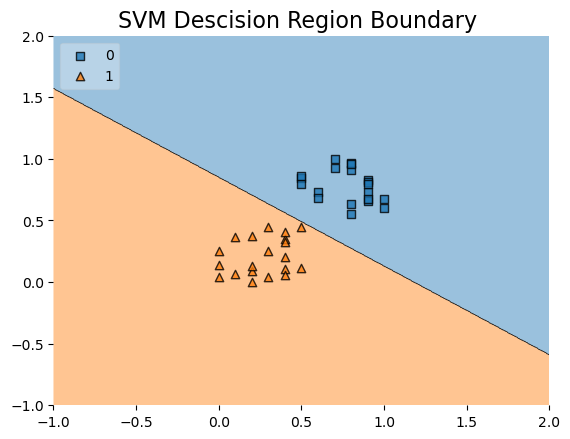

In [119]:
plot_decision_regions(X,np.array(Y),clf = model,legend=2)
plt.title("SVM Descision Region Boundary ",size=16)

In [120]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [121]:
from mlxtend.plotting import plot_learning_curves

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.25, 0.125, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

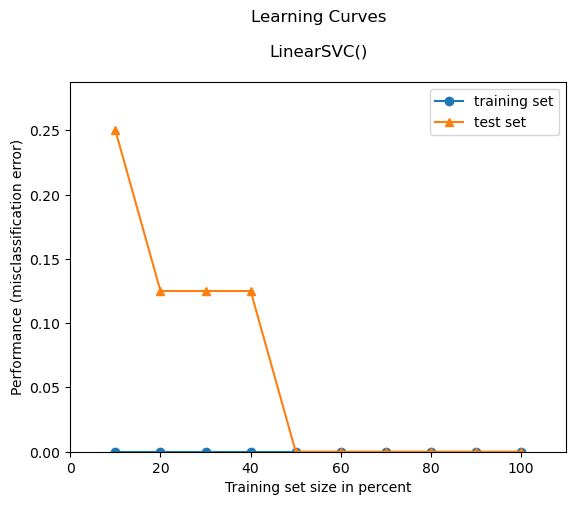

In [122]:
plot_learning_curves(xtrain,ytrain,xtest,ytest,model,scoring='misclassification error')

<Axes: >

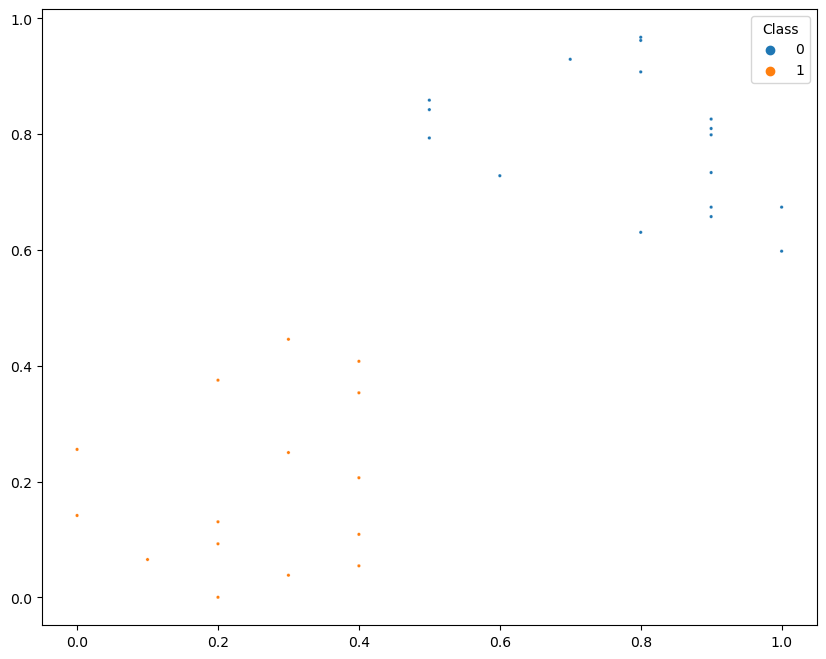

In [127]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.scatterplot(x=xtrain[:,0],y=xtrain[:,1],hue=ytrain,s=6)

In [128]:
w = model.coef_[0]

In [129]:
w

array([-1.25465686, -1.7411059 ])

In [130]:
b = model.intercept_[0]

In [131]:
b

1.4810635761113626

In [132]:
xPoints  = np.linspace(-1,1)

In [134]:
xPoints

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

In [138]:
yPoints = -(w[0]/w[1])*xPoints-b/w[1]

In [139]:
yPoints

array([1.57125447, 1.54184185, 1.51242924, 1.48301662, 1.453604  ,
       1.42419138, 1.39477876, 1.36536614, 1.33595352, 1.3065409 ,
       1.27712829, 1.24771567, 1.21830305, 1.18889043, 1.15947781,
       1.13006519, 1.10065257, 1.07123995, 1.04182733, 1.01241472,
       0.9830021 , 0.95358948, 0.92417686, 0.89476424, 0.86535162,
       0.835939  , 0.80652638, 0.77711377, 0.74770115, 0.71828853,
       0.68887591, 0.65946329, 0.63005067, 0.60063805, 0.57122543,
       0.54181281, 0.5124002 , 0.48298758, 0.45357496, 0.42416234,
       0.39474972, 0.3653371 , 0.33592448, 0.30651186, 0.27709925,
       0.24768663, 0.21827401, 0.18886139, 0.15944877, 0.13003615])

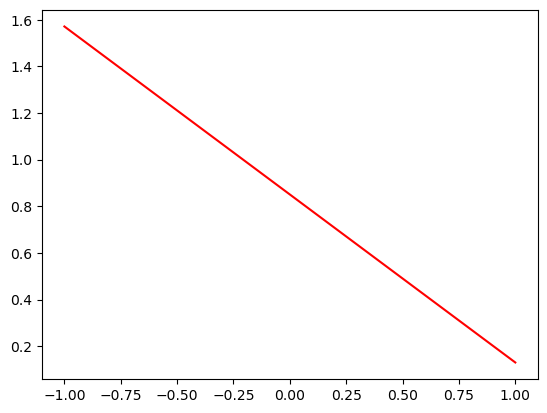

In [151]:
plt.plot(xPoints,yPoints,c='r')

In [140]:
w_hat = model.coef_[0]/(np.sqrt(np.sum(model.coef_[0]**2)))

In [141]:
margin = 1 / np.sqrt(np.sum(model.coef_[0]**2))

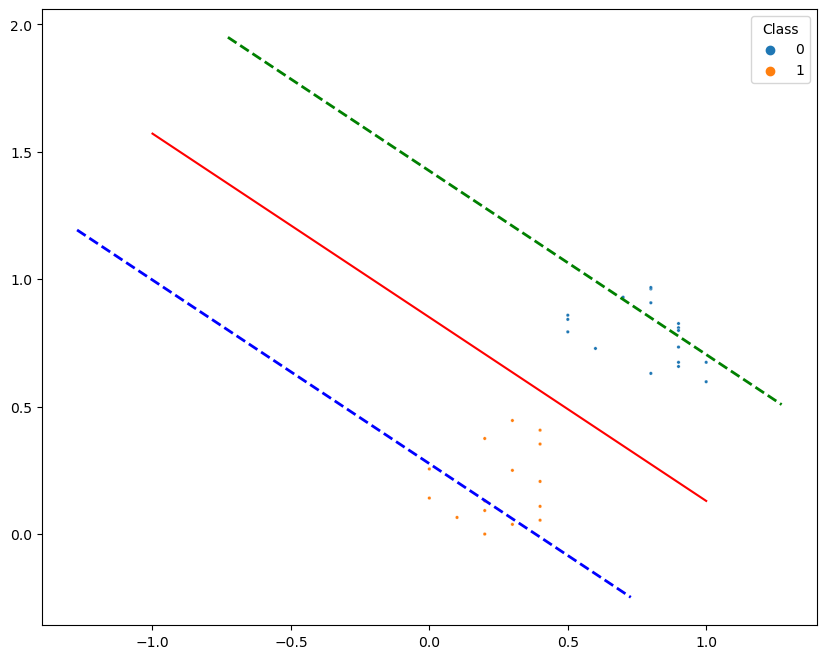

In [152]:
decision_boundary_points = np.array(list(zip(xPoints,yPoints)))
above = decision_boundary_points+w_hat*margin
below = decision_boundary_points-w_hat*margin
plt.figure(figsize=(10,8))
sns.scatterplot(x=xtrain[:,0],y=xtrain[:,1],hue=ytrain,s=6)
plt.plot(xPoints,yPoints,c='r')
plt.plot(above[:,0],above[:,1],'b--',linewidth=2)
plt.plot(below[:,0],below[:,1],'g--',linewidth=2)